# Predicting Income

This is a binary classification task to predict if income is above or below a certain threshold

The CRISP-DM system was used in this exercise.

The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model with six phases that naturally describes the data science life cycle. It’s like a set of guardrails to help you plan, organize, and implement your data science (or machine learning) project. [Read more](https://www.datascience-pm.com/crisp-dm-2/)

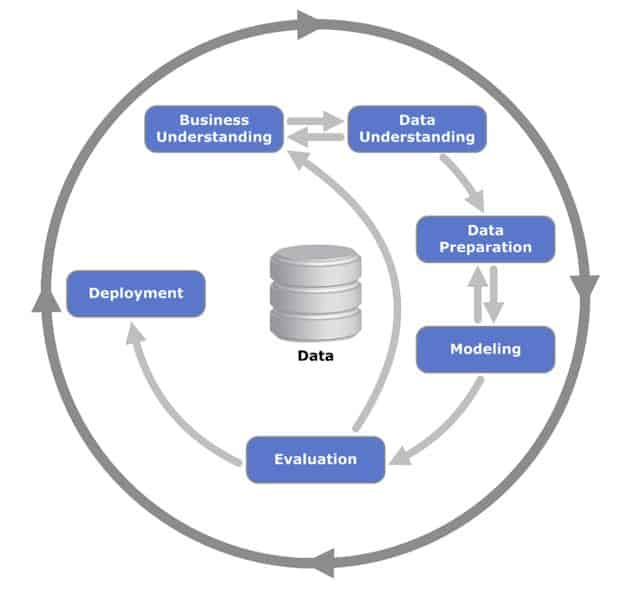

1. Business Understanding - The objective of the exercise is to predict income of a citizen (below or above $50k) depending on factors presented.
2. Data Understanding - The data provided is in a csv file containing 32561 records from a census. There are unknown values in columns such as occupation and workclass. Exploratory analysis will be carried out in the notebook below
3. Data Preparation - Unknown records were handled by labelling as 'unknown' and assigned a numerical value.
4. Modelling - 4 models will be evaluated for this classification task: logictic regression, random forest, k-nearest neighbors, decision tree. Training and test data was split 60:40.
5. Evaluation - Each of the 4 models will be compared and evaluated
6. Deployment - This was not within the scope of this exercise

### Data Understanding

 the data consists of 20 input variables and one output variable. The details are as follows.

**Input variables:**
1. age - numeric
2. workclass - (categorical: '?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc' 'Local-gov' 'Without-pay' 'Never-worked'
3. fnlwgt - numeric
4. education - (categorical: 'HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school' 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th' '12th' '9th' 'Preschool')
5. education-num - numeric
6. marital-status - (categorical: 'Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse' 'Married-spouse-absent' 'Married-AF-spouse')
7. occupation - categorical ('?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces' 'Priv-house-serv')
8. relationship - (categorical: 'Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife')
9. sex - categorical: 'Female' 'Male'
10. capital-gain - numeric
11. capital-loss - numeric
12. hours-per-week - numeric
13. native-country - (categorical: 'United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India' 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands''Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong' 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua' 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia' 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland' 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)')
 
 
**Output variable:**

14. income - (Binary: '<=50K' '>50K')

## Data Inspection

In [1]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load census data into a pandas dataframe
census_data = pd.read_csv('censusdb.csv')

In [4]:
#check head of the data
census_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [5]:
#check shape of the entire dataframe using .shape attribute. Dataframe contains 32,561 rows and 14 columns
census_data.shape

(32561, 14)

In [6]:
#use info() method to check columns and datatypes of each column in your data frame
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [7]:
census_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#Check for missing values
census_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### There are no missing values

In [9]:
#Check for duplicates
census_data[census_data.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,Female,0,0,10,United-States,<=50K


In [10]:
#Check for unique values for each categorical variable

for obj in census_data.select_dtypes(include='object'):
    print(obj + ' contains: ' + str(census_data[obj].unique()))

print('\nNumber of unique values in each categorical/object feature')
print(census_data.select_dtypes(include='object').nunique())

workclass contains: ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education contains: ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital-status contains: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation contains: ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship contains: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
sex contains: ['Female' 'Male']
native-country contains: ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Can

In [11]:
# Unknown/Missing values are represented by ? in some columns. Check the number of unknown variables 

a = census_data[census_data=='?'].count()
b = census_data[census_data!='?'].count()
c = census_data.count()
d = round(a/c*100,2)
e = round(b/c*100,2)
f = round(c/c*100,2)
pd.concat([a,b,c,d,e,f],axis=1).rename(columns={0: "# of Unknown Data", 
                                                1: "# of Known Data",
                                                2: "# of Total Data",
                                                3: "% of Unknown Data",
                                                4: "% of Known Data",
                                                5: "% of Total Data", })

,# of Unknown Data,# of Known Data,# of Total Data,% of Unknown Data,% of Known Data,% of Total Data
age,0,32561,32561,0.00,100.00,100.0
workclass,1836,30725,32561,5.64,94.36,100.0
fnlwgt,0,32561,32561,0.00,100.00,100.0
education,0,32561,32561,0.00,100.00,100.0
education-num,0,32561,32561,0.00,100.00,100.0
marital-status,0,32561,32561,0.00,100.00,100.0
occupation,1843,30718,32561,5.66,94.34,100.0
relationship,0,32561,32561,0.00,100.00,100.0
sex,0,32561,32561,0.00,100.00,100.0
capital-gain,0,32561,32561,0.00,100.00,100.0


In [12]:
#check distribution of values in the target column. 

census_data.income.value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

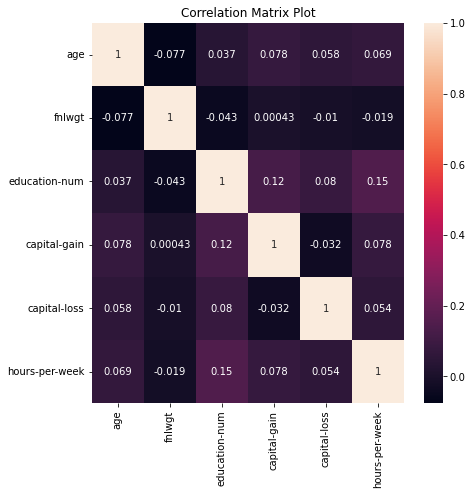

In [13]:
# Check correlation of variables using a correlation matrix (Numerical Data).

plt.figure(figsize=(7, 7))
sns.heatmap(census_data.corr(), annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

### Based on the data exploration above, the following can be observed:

* The dataset has 14 variables (13 input variables and 1 output variable) with 32561 entries.
* Some variables have unknown values below 6% including Workclass, Occupation and Native Country. All other data is complete.
* There are duplicated entries in the dataset.
* There is a significant imbalance in the variable data to be predicted ('income'), where the proportion of citizens with income less than or equal to 50k to those greater than 50k is 75.9% to 24.1% respectively.
* Variables have very little correlation with each other (< 0.15)


### Data Visualization

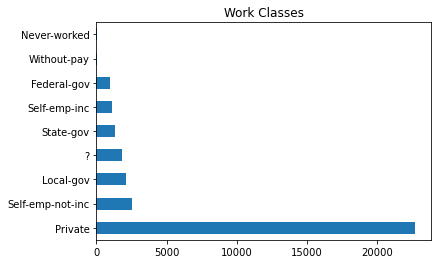

In [14]:
#Distribution of work Classes

census_data.workclass.value_counts().plot.barh()
plt.title('Work Classes')
plt.show()

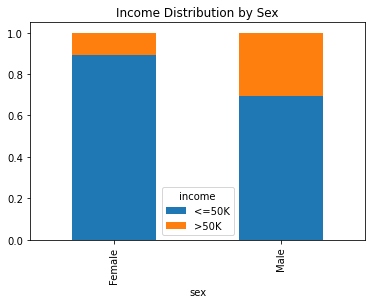

In [15]:
# Distribution of Income by Gender

sex_income_pivot = pd.crosstab(census_data.sex,census_data.income,normalize='index')

sex_income_pivot.plot.bar(stacked=True)

plt.title('Income Distribution by Sex')
plt.show()

From the image above, a higher percentage of Females earn below 50k compared to their Male counterparts

In [16]:
# Distribution of income by Gender

sex_income_pivot = pd.crosstab(census_data.sex,census_data.income,normalize='index')
display(sex_income_pivot)

income,<=50K,>50K
sex,,
Female,0.890539,0.109461
Male,0.694263,0.305737


**Distribution by Native Country**

Text(0.5, 1.0, 'Distribution by Native Country')

<Figure size 1080x576 with 0 Axes>

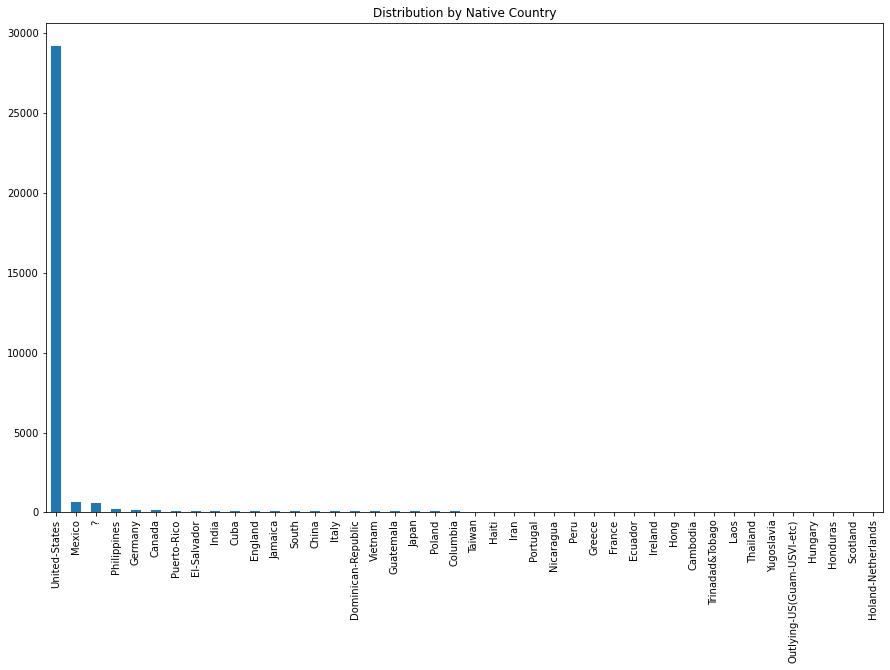

In [17]:

plt.figure(figsize=(15,8)) #this is to make the image larger

#Your code here:
plt.figure(figsize=(15,9))

census_data['native-country'].value_counts().plot.bar()
plt.title('Distribution by Native Country')


### Data Understanding :

**What effect does education have on income?**

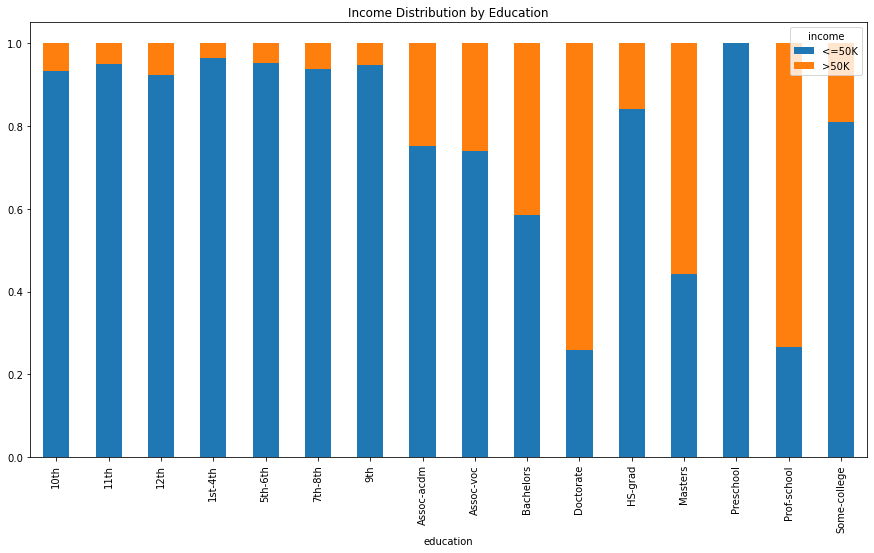

In [18]:
#create pivot of sex and income
education_income_pivot = pd.crosstab(census_data.education,census_data.income,normalize='index')

#plot the data
education_income_pivot.plot.bar(stacked=True, figsize=(15,8))

plt.title('Income Distribution by Education')
plt.show()

Educational level is directly proportional to Income. Higher educational qualifications show an increase in the population earning above 50k.

## Feature Engineering

In this stage we prepare the data for modelling. It's all about selecting, manipulating and transforming data into features that the machine learning algorithms can work better with.

In [19]:
# remove duplicates
census_data = census_data.drop_duplicates()
census_data.shape

(32537, 14)

In [20]:
# replace '?' with 'unknown'

census_data.replace('?', 'Unknown', inplace=True)
census_data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [21]:
#Scaling numeric data using standard scaler

from sklearn.preprocessing import StandardScaler

numeric_variables = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

scaler = StandardScaler()
census_data[numeric_variables]  = scaler.fit_transform(census_data[numeric_variables])
print(census_data[numeric_variables])

            age    fnlwgt  education-num  capital-gain  capital-loss  \
0      3.770003 -1.067955      -0.420679     -0.145975     10.589625   
1      3.183397 -0.539159      -0.420679     -0.145975     10.589625   
2      2.010185 -0.035241      -0.031815     -0.145975     10.589625   
3      1.130276 -0.468210      -2.364998     -0.145975      9.458380   
4      0.177041  0.709415      -0.031815     -0.145975      9.458380   
...         ...       ...            ...           ...           ...   
32556 -1.216148  1.140366      -0.031815     -0.145975     -0.216743   
32557 -0.849519  0.639678       0.745913     -0.145975     -0.216743   
32558  0.103716 -0.335436      -0.420679     -0.145975     -0.216743   
32559  1.423579 -0.358779      -0.420679     -0.145975     -0.216743   
32560 -1.216148  0.110930      -0.420679     -0.145975     -0.216743   

       hours-per-week  
0           -0.035664  
1           -1.817516  
2           -0.035664  
3           -0.035664  
4           -0.

In [22]:
#Encode the features
from sklearn.preprocessing import LabelEncoder

# Encode the target (income) using label encoder
le = LabelEncoder() # Initialize the Encoder
census_data['income'] = le.fit_transform(census_data['income']) #Fit and transform


# Encode the categorical features using dummy encoding

categorical = ['workclass','occupation','marital-status','relationship','sex','native-country']

categorical_dummies = pd.get_dummies(census_data[categorical])

categorical_dummies.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,occupation_Adm-clerical,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both census_data and categories_dummies as a list of their names


census_data = pd.concat([census_data, categorical_dummies], axis=1)

#check what you have done
print(census_data.shape)
census_data.head()

(32537, 95)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,3.770003,Unknown,-1.067955,HS-grad,-0.420679,Widowed,Unknown,Not-in-family,Female,-0.145975,...,0,0,0,0,0,0,1,0,0,0
1,3.183397,Private,-0.539159,HS-grad,-0.420679,Widowed,Exec-managerial,Not-in-family,Female,-0.145975,...,0,0,0,0,0,0,1,0,0,0
2,2.010185,Unknown,-0.035241,Some-college,-0.031815,Widowed,Unknown,Unmarried,Female,-0.145975,...,0,0,0,0,0,0,1,0,0,0
3,1.130276,Private,-0.468210,7th-8th,-2.364998,Divorced,Machine-op-inspct,Unmarried,Female,-0.145975,...,0,0,0,0,0,0,1,0,0,0
4,0.177041,Private,0.709415,Some-college,-0.031815,Separated,Prof-specialty,Own-child,Female,-0.145975,...,0,0,0,0,0,0,1,0,0,0


In [24]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical to delete all the initially selected columns at once


census_data = census_data.drop(categorical,axis=1)
census_data

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,3.770003,-1.067955,HS-grad,-0.420679,-0.145975,10.589625,-0.035664,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3.183397,-0.539159,HS-grad,-0.420679,-0.145975,10.589625,-1.817516,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.010185,-0.035241,Some-college,-0.031815,-0.145975,10.589625,-0.035664,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.130276,-0.468210,7th-8th,-2.364998,-0.145975,9.458380,-0.035664,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.177041,0.709415,Some-college,-0.031815,-0.145975,9.458380,-0.035664,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.216148,1.140366,Some-college,-0.031815,-0.145975,-0.216743,-0.035664,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,-0.849519,0.639678,Assoc-acdm,0.745913,-0.145975,-0.216743,-0.197650,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32558,0.103716,-0.335436,HS-grad,-0.420679,-0.145975,-0.216743,-0.035664,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,1.423579,-0.358779,HS-grad,-0.420679,-0.145975,-0.216743,-0.035664,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Also drop `education` column since there's already an `education-num` column with numeric encoding for this information



In [25]:
#Your code here:

census_data.drop(['education'], axis=1, inplace=True)
census_data.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,3.770003,-1.067955,-0.420679,-0.145975,10.589625,-0.035664,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3.183397,-0.539159,-0.420679,-0.145975,10.589625,-1.817516,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.010185,-0.035241,-0.031815,-0.145975,10.589625,-0.035664,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.130276,-0.468210,-2.364998,-0.145975,9.458380,-0.035664,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.177041,0.709415,-0.031815,-0.145975,9.458380,-0.035664,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
print(census_data.shape)


(32537, 88)


### Select Target and Features

In [27]:
#your code here:

y = census_data.income
X = census_data.drop('income', axis=1)

In [28]:
print(X.head())
print(y.head())

        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  3.770003 -1.067955      -0.420679     -0.145975     10.589625   
1  3.183397 -0.539159      -0.420679     -0.145975     10.589625   
2  2.010185 -0.035241      -0.031815     -0.145975     10.589625   
3  1.130276 -0.468210      -2.364998     -0.145975      9.458380   
4  0.177041  0.709415      -0.031815     -0.145975      9.458380   

   hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0       -0.035664                      0                    0   
1       -1.817516                      0                    0   
2       -0.035664                      0                    0   
3       -0.035664                      0                    0   
4       -0.035664                      0                    0   

   workclass_Never-worked  workclass_Private  ...  native-country_Puerto-Rico  \
0                       0                  0  ...                           0   
1                       0             

### Modelling

Predictive models that will be used are Logistic Regression, Decision Tree Classifier, KNeighbors Classifier and Random Forest.

In [29]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [30]:
#split into training and validation sets using a 40% split ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [31]:
# Initialize models logistic regression
LR = LogisticRegression()
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [32]:
#create function to train a model and evaluate accuracy

models = [LR,KN,DC,RF]

def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction, y_test))
    

In [33]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)
    


For LogisticRegression, Accuracy score is 0.8534767575873992 

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10358
           1       0.62      0.73      0.67      2657

    accuracy                           0.85     13015
   macro avg       0.77      0.81      0.79     13015
weighted avg       0.86      0.85      0.86     13015


For KNeighborsClassifier, Accuracy score is 0.8300422589320016 

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     10061
           1       0.62      0.65      0.64      2954

    accuracy                           0.83     13015
   macro avg       0.76      0.77      0.76     13015
weighted avg       0.83      0.83      0.83     13015


For DecisionTreeClassifier, Accuracy score is 0.816135228582405 

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9768
           1       0.64      0.61      0

**The Random Forest Classifier offers the best accuracy while Decision Tree Classifier is the least accurate.**

### Inspect Feature Importances

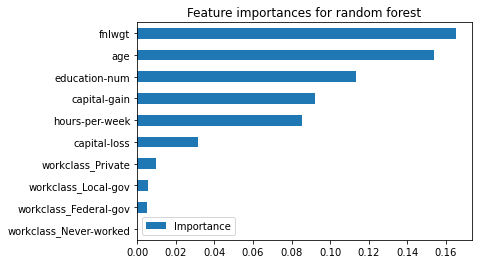

In [34]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [35]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['workclass_Never-worked', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'capital-loss',
       'hours-per-week', 'capital-gain', 'education-num', 'age', 'fnlwgt'],
      dtype=object)

The major variables that influence whether or not a person earns below or above 50k in order of importance include:

* Fnlwgt
* Age
* Education
* Capital Gain
* Hours per Week
* Capital Loss
* Workclass

These variables must be considered in determining a person's Income.